<a href="https://colab.research.google.com/github/XavierCarrera/machine-learning/blob/master/Machine_Learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Tensor Work

In [2]:
torch.__version__

'1.6.0+cu101'

In [3]:
tensor_a = torch.ones(2, 2)
tensor_a

tensor([[1., 1.],
        [1., 1.]])

In [5]:
tensor_b = torch.Tensor(2, 2)
print(tensor_b)
tensor_b.uniform_(0, 1)

tensor([[2.3397e-37, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])


tensor([[0.1124, 0.1031],
        [0.2767, 0.3957]])

In [6]:
tensor_c = torch.rand(2, 2)
tensor_c

tensor([[0.0579, 0.4742],
        [0.4256, 0.4029]])

In [7]:
result = tensor_b + tensor_c
result

tensor([[0.1703, 0.5773],
        [0.7024, 0.7987]])

In [8]:
result.shape

torch.Size([2, 2])

In [10]:
reshaped = result.view(4,1)
reshaped

tensor([[0.1703],
        [0.5773],
        [0.7024],
        [0.7987]])

In [12]:
points = torch.tensor([[1.0, 2.0],[3.0,4.0]])
print(points)
points[0][1] = 2.5
print(points)
points.storage() 

tensor([[1., 2.],
        [3., 4.]])
tensor([[1.0000, 2.5000],
        [3.0000, 4.0000]])


 1.0
 2.5
 3.0
 4.0
[torch.FloatStorage of size 4]

In [13]:
points, points.stride()

(tensor([[1.0000, 2.5000],
         [3.0000, 4.0000]]), (2, 1))

In [15]:
p_t = points.t()
p_t, p_t.stride()
p_t

tensor([[1.0000, 3.0000],
        [2.5000, 4.0000]])

In [16]:
tensor_x = torch.tensor([1,2,3,4])
tensor_x, torch.unsqueeze(tensor_x, 1)

(tensor([1, 2, 3, 4]), tensor([[1],
         [2],
         [3],
         [4]]))

In [21]:
numpayArray = np.random.randn(2,2)
from_numpy = torch.from_numpy(numpayArray)

# Tensor Data Representation

In [23]:
print(from_numpy)
print(torch.mean(from_numpy))
print(torch.mean(from_numpy, dim=0))
print(torch.mean(from_numpy, dim=1))

tensor([[ 0.4310,  0.4040],
        [-0.6459, -0.3200]], dtype=torch.float64)
tensor(-0.0327, dtype=torch.float64)
tensor([-0.1074,  0.0420], dtype=torch.float64)
tensor([ 0.4175, -0.4829], dtype=torch.float64)


In [24]:
torch.std(from_numpy)

tensor(0.5367, dtype=torch.float64)

In [25]:
torch.save(from_numpy, "tensor.t")

In [26]:
torch.load("tensor.t")

tensor([[ 0.4310,  0.4040],
        [-0.6459, -0.3200]], dtype=torch.float64)

In [28]:
url = "https://raw.githubusercontent.com/amanthedorkknight/fifa18-all-player-statistics/master/2019/data.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

In [29]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [37]:
subset = df[["Overall", "Age", 'International Reputation', 'Weak Foot',
       'Skill Moves']].dropna(axis=0, how="any")

columns = subset.columns[1:]
players = torch.tensor(subset.values).float()
players.shape, players.type()

(torch.Size([18159, 5]), 'torch.FloatTensor')

In [36]:
data = players[:, 1:]
data, data.shape

(tensor([[31.,  5.,  4.,  4.],
         [33.,  5.,  4.,  5.],
         [26.,  5.,  5.,  5.],
         ...,
         [16.,  1.,  3.,  2.],
         [17.,  1.,  3.,  2.],
         [16.,  1.,  3.,  2.]]), torch.Size([18159, 4]))

In [38]:
target = players[:, 0]
target, target.shape

(tensor([94., 94., 92.,  ..., 47., 47., 46.]), torch.Size([18159]))

In [39]:
mean = torch.mean(data, dim=0)
mean

tensor([25.1225,  1.1132,  2.9473,  2.3613])

In [40]:
std = torch.std(data, dim=0)
std

tensor([4.6706, 0.3940, 0.6605, 0.7562])

In [41]:
norm = (data - mean)/torch.sqrt(std)
norm

tensor([[ 2.7196,  6.1919,  1.2953,  1.8845],
        [ 3.6450,  6.1919,  1.2953,  3.0345],
        [ 0.4060,  6.1919,  2.5258,  3.0345],
        ...,
        [-4.2211, -0.1804,  0.0648, -0.4155],
        [-3.7584, -0.1804,  0.0648, -0.4155],
        [-4.2211, -0.1804,  0.0648, -0.4155]])

In [42]:
good = data[torch.ge(target, 85)]
average = data[torch.ge(target, 70) & torch.lt(target, 85)]
bad = data[torch.lt(target, 70)]

goodMean = torch.mean(good, dim=0)
averageMean = torch.mean(average, dim=0)
badMean = torch.mean(bad, dim=0)

goodMean, averageMean, badMean

(tensor([28.3455,  3.3818,  3.4455,  3.0364]),
 tensor([27.1686,  1.3066,  3.0910,  2.7241]),
 tensor([24.1909,  1.0079,  2.8795,  2.1952]))

In [44]:
for i, args in enumerate(zip(columns, goodMean, averageMean, badMean)):
  print('{:25}{:6.2f}{:6.2f}{:6.2f}'.format(*args))

Age                       28.35 27.17 24.19
International Reputation   3.38  1.31  1.01
Weak Foot                  3.45  3.09  2.88
Skill Moves                3.04  2.72  2.20


# Linnear Regression

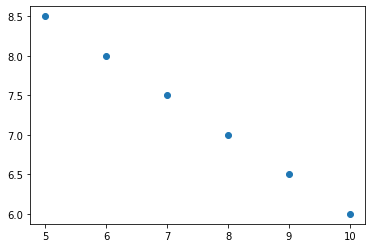

In [46]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

In [47]:
prices_array = np.array(car_prices).reshape(-1,1)
units_array = np.array(units_sold).reshape(-1,1)

print(prices_array)
print(units_array)

[[ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[8.5]
 [8. ]
 [7.5]
 [7. ]
 [6.5]
 [6. ]]


In [49]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

tensor(0.0145, grad_fn=<MseLossBackward>)


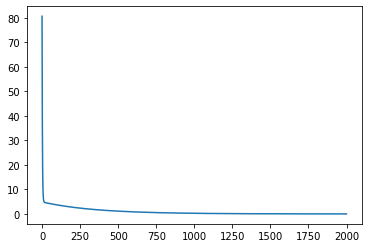

In [54]:
model = nn.Linear(1, 1)

loss_functions = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.015)
losses = []
iterations = 2000

for i in range(iterations):
  pred = model(prices)
  loss = loss_functions(pred, units)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(loss)
plt.plot(range(iterations), losses)

In [56]:
x = torch.Tensor([[4.0]])
p = model(x)
p

tensor([[8.7331]], grad_fn=<AddmmBackward>)

# Logistic Regression

In [58]:
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[-3.67542799, -5.43947377],
       [-1.75884954, -1.79569266],
       [ 1.01111709,  0.57373716],
       [ 0.92906087,  2.86821044],
       [-1.34233041,  2.20954627],
       [ 5.62099831, -5.2677377 ],
       [-2.04714274, -3.68874145],
       [ 1.77082478, -0.7835023 ],
       [-1.53407666, -2.48863535],
       [-5.67779836,  3.33926257],
       [ 1.18793773,  3.00064687],
       [-0.90059221, -4.53984752],
       [-1.12660338, -1.15469195],
       [-0.13760622,  1.65534016],
       [-0.01467683, -4.83657512],
       [-4.56882584, -3.05323225],
       [ 4.1123188 ,  0.76464486],
       [ 0.97502661,  0.06599941],
       [-0.8039306 , -0.13981456],
       [ 0.90464778, -1.55938218],
       [ 0.28911901,  1.11496084],
       [-4.00196027,  2.0292261 ],
       [-1.56538211,  3.10929813],
       [ 0.05402377, -2.26624083],
       [ 0.66986547,  2.28363539],
       [ 1.64179863,  2.7638337 ],
       [ 2.03288199,  3.39207576],
       [-3.28878889, -0.8062588 ],
       [ 0.62397923,

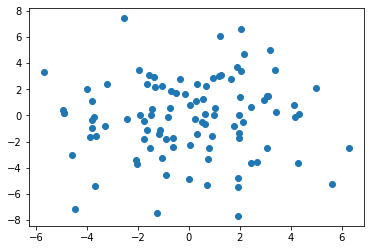

In [59]:
plt.scatter(data[:,0], data[:,1])

In [60]:
data[:h, :]= data[:h, :] - 3*np.ones((h, dimen))

In [61]:
data[h:, :]= data[h:, :] - 3*np.ones((h, dimen))

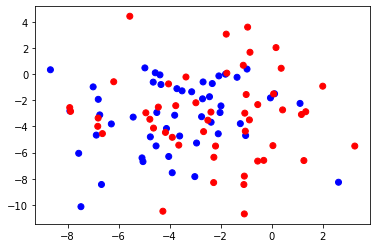

In [64]:
colors = ["blue", "red"]
color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color)

In [65]:
target = np.array([0]*h + [1]*h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.6565, grad_fn=<BinaryCrossEntropyBackward>)

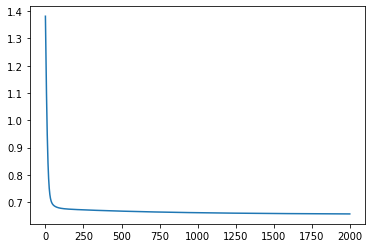

In [67]:
model = nn.Sequential(
          nn.Linear(2,1),
          nn.Sigmoid()
      )
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

iterations = 2000

for i in range(iterations):
  result = model(x)
  
  loss = loss_function(result, y)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  
  optimizer.step()

plt.plot(range(iterations), losses)
loss


In [68]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])


blue
red


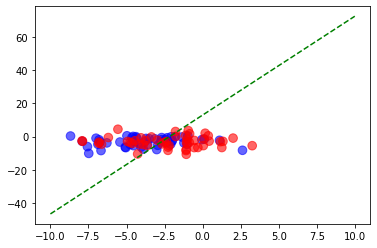

In [69]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis,'g--')